# # PART 1: Sentiment Analysis using VADER

In [ ]:
# download vader_lexicon using nltk.download()
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Read the csv
#fileName = "/content/drive/My Drive/ISS/CompiledCases.csv"
fileName = "/content/drive/My Drive/ISS/riskScores.csv"
column = "case"
Data = pd.read_csv(fileName,encoding="Latin-1")
Data = Data.replace(np.nan,' ',regex=True)
sentences = list(Data[column])
Data.head()


,case,conclusion,conclusion_certainty,case_without_conclusion,evidence,score_1,name_1,score_2,name_2,score_3,name_3,final_score
0,On behalf of Ms. Amira I would like to ask for...,,,On behalf of Ms. Amira I would like to ask for...,,0.1,Jianna,0.08,Kamal,0.1,Shrey Grover,0.09
1,The following information has been supplied by...,,,The following information has been supplied by...,,0.95,Jianna,0.7,Kamal,0.9,Shrey Grover,0.85
2,I hope you all are well and sane in these chal...,,,I hope you all are well and sane in these chal...,,0.8,Jianna,0.7,Shrey Grover,0.65,Kamal,0.72
3,"The child protection office in Beirut, Lebanon...",,,"The child protection office in Beirut, Lebanon...",,0.6,Jianna,0.65,Shrey Grover,0.58,Kamal,0.61
4,I am writing from Children and Families Across...,,,I am writing from Children and Families Across...,,0.05,Jianna,0.2,Shrey Grover,0.1,Kamal,0.12


In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
# Calculate Polarity scores
# nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()
def createPolarity(sentence):
    ss = sid.polarity_scores(sentence)
    return ss

In [ ]:
Data["sentiment"] = Data["case"].apply(lambda x: createPolarity(x) )

In [ ]:
df = Data[["case", "sentiment", "final_score"]]
df.head()

,case,sentiment,final_score
0,On behalf of Ms. Amira I would like to ask for...,"{'neg': 0.053, 'neu': 0.895, 'pos': 0.053, 'co...",0.09
1,The following information has been supplied by...,"{'neg': 0.044, 'neu': 0.902, 'pos': 0.055, 'co...",0.85
2,I hope you all are well and sane in these chal...,"{'neg': 0.046, 'neu': 0.882, 'pos': 0.072, 'co...",0.72
3,"The child protection office in Beirut, Lebanon...","{'neg': 0.07, 'neu': 0.871, 'pos': 0.059, 'com...",0.61
4,I am writing from Children and Families Across...,"{'neg': 0.033, 'neu': 0.856, 'pos': 0.111, 'co...",0.12


In [ ]:
df.dtypes

case           object
sentiment      object
final_score    object
dtype: object

#Breaking this series into 4 different columns - neg, neu, pos and compound
df['compound']  = df['sentiment'].apply(lambda score_dict: score_dict['compound'])
df['Negative']  = df['sentiment'].apply(lambda score_dict: score_dict['neg'])
df['Positive']  = df['sentiment'].apply(lambda score_dict: score_dict['pos'])
df['Neutral']  = df['sentiment'].apply(lambda score_dict: score_dict['neu'])

df.head()

In [ ]:
#On the basis of compound column, we will create a new column Final Sentiment
def analyze_sentiment_vader_lexicon(review):
   
    # analyze the sentiment for review
    analyzer = SentimentIntensityAnalyzer()
    scores = analyzer.polarity_scores(review)
    # get aggregate scores and final sentiment
    agg_score = scores['compound']
    #sentiment_Vader = 'positive' if agg_score >= threshold\
     #                              else 'negative'
    
    if(agg_score >= 0.05):
        sentiment_Vader = 'High Risk'
    elif(agg_score <= -0.05):
        sentiment_Vader = 'Low Risk'
    else:
        sentiment_Vader = 'neutral'
      
    
    return sentiment_Vader 
#or 1 liner
#df['sentiment_Vader'] = df['compound'].apply(lambda x: 'positive' if x > 0.1 else 'negative')

In [ ]:
df["sentiment_Vader"] = df["case"].apply(lambda x: analyze_sentiment_vader_lexicon(x) )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
# to display more of the text content
pd.set_option('display.max_colwidth', 100)

df.head(30)

,case,sentiment,final_score,sentiment_Vader
0,On behalf of Ms. Amira I would like to ask for your cooperation in tracing her biological mother...,"{'neg': 0.053, 'neu': 0.895, 'pos': 0.053, 'compound': -0.2205}",0.09,Low Risk
1,The following information has been supplied by the Youth Welfare Office in Berlin The Social Wor...,"{'neg': 0.044, 'neu': 0.902, 'pos': 0.055, 'compound': 0.9416}",0.85,High Risk
2,I hope you all are well and sane in these challenging times. I kindly ask you for your support i...,"{'neg': 0.046, 'neu': 0.882, 'pos': 0.072, 'compound': 0.9065}",0.72,High Risk
3,"The child protection office in Beirut, Lebanon, requests ISS assistance regarding a 6-year-old S...","{'neg': 0.07, 'neu': 0.871, 'pos': 0.059, 'compound': -0.9536}",0.61,Low Risk
4,"I am writing from Children and Families Across Borders, UK, to request your assistance on this c...","{'neg': 0.033, 'neu': 0.856, 'pos': 0.111, 'compound': 0.9988}",0.12,High Risk
5,"Ms SD, a German national, contacted ISS Germany looking for her father she had never met and who...","{'neg': 0.019, 'neu': 0.91, 'pos': 0.071, 'compound': 0.7354}",0.13,High Risk
6,"Jose was deported from the USA to his homeland in Mexico, leaving behind his wife, Mariel and th...","{'neg': 0.0, 'neu': 0.835, 'pos': 0.165, 'compound': 0.9903}",0.73,High Risk
7,Karim (6) and Ziad (8) are the sons of two divorced Lebanese nationals. The father remarried a L...,"{'neg': 0.026, 'neu': 0.875, 'pos': 0.099, 'compound': 0.926}",0.77,High Risk
8,"Children from Guinea Bissau, who under the pretext of being drought by Koranic Masters to learn ...","{'neg': 0.022, 'neu': 0.871, 'pos': 0.107, 'compound': 0.872}",0.9,High Risk
9,Mary Jackson (not her real name) is a 15 year old girl with a very strong passion for education ...,"{'neg': 0.065, 'neu': 0.839, 'pos': 0.096, 'compound': 0.8144}",0.97,High Risk


df.to_csv("sentimentAnalysis.csv")

In [ ]:
#Total number of different actual sentiments
actualNeg = len(df[df['sentiment_Vader']=='High Risk'])
actualPos = len(df[df['sentiment_Vader']=='Low Risk'])
actualNeu = len(df[df['sentiment_Vader']=='neutral'])
print("Number of positive sentiments is  " + str(actualPos))
print("Number of negative sentiments is " + str(actualNeg))
print("Number of neutral sentiments is " + str(actualNeu))


Number of positive sentiments is  158
Number of negative sentiments is 74
Number of neutral sentiments is 0


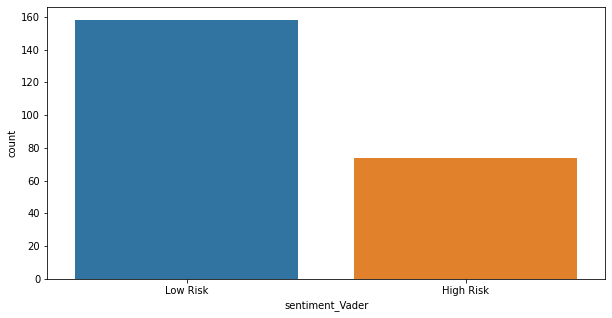

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,5))
sns.countplot(x='sentiment_Vader',data=df)

In [ ]:
#Count of texts in each category of sentiments
temp = df.groupby('sentiment_Vader').count()['case'].reset_index().sort_values(by='case',ascending=False)
temp.style.background_gradient(cmap='Greens')

,sentiment_Vader,case
1,Low Risk,158
0,High Risk,74


In [ ]:
#funnel chart for visualization
from plotly import graph_objs as go
import plotly.figure_factory as ff

fig = go.Figure(go.Funnelarea(
    text =temp.sentiment_Vader,
    values = temp.case,
    title = {"position": "top center", "text": "Funnel-Chart of VADER Sentiment Distribution"}
    ))
fig.show()

# PART 2: Sentiment Analysis using Flair





In [ ]:
#source - https://colab.research.google.com/drive/1tUr5t0ZJ-I4Ni40dkbjku92HAU5SyR_2?usp=sharing#scrollTo=tIdJp01PsbGT
!pip install -q flair 



     |████████████████████████████████| 337kB 12.1MB/s 
     |████████████████████████████████| 798kB 25.0MB/s 
     |████████████████████████████████| 1.3MB 45.1MB/s 
     |████████████████████████████████| 1.1MB 44.7MB/s 
     |████████████████████████████████| 19.7MB 1.4MB/s 
     |████████████████████████████████| 71kB 7.5MB/s 
     |████████████████████████████████| 983kB 32.7MB/s 
     |████████████████████████████████| 890kB 41.0MB/s 
     |████████████████████████████████| 2.9MB 38.8MB/s 
ERROR: transformers 3.5.1 has requirement sentencepiece==0.1.91, but you'll have sentencepiece 0.1.94 which is incompatible.


In [ ]:
from flair.models import TextClassifier
from flair.data import Sentence

classifier = TextClassifier.load('en-sentiment')


2020-11-19 04:54:33,325 https://nlp.informatik.hu-berlin.de/resources/models/sentiment-curated-distilbert/sentiment-en-mix-distillbert_3.1.pt not found in cache, downloading to /tmp/tmprq59dvh7


100%|██████████| 266147697/266147697 [00:06<00:00, 39908482.56B/s]

2020-11-19 04:54:40,062 copying /tmp/tmprq59dvh7 to cache at /root/.flair/models/sentiment-en-mix-distillbert_3.1.pt


2020-11-19 04:54:41,329 removing temp file /tmp/tmprq59dvh7
2020-11-19 04:54:42,174 loading file /root/.flair/models/sentiment-en-mix-distillbert_3.1.pt


In [ ]:
def text_sentiment_flair(text):
  sentence = Sentence(text)
  classifier.predict(sentence)
  #return sentence.labels[0].score
  return sentence.labels
#These all are Negative 

In [ ]:
df['sentiment_flair'] = df['case'].apply(lambda x : text_sentiment_flair(x))

In [ ]:
df.head()

,case,sentiment,final_score,sentiment_Vader,sentiment_flair
0,On behalf of Ms. Amira I would like to ask for your cooperation in tracing her biological mother...,"{'neg': 0.053, 'neu': 0.895, 'pos': 0.053, 'compound': -0.2205}",0.09,Low Risk,[NEGATIVE (0.9888)]
1,The following information has been supplied by the Youth Welfare Office in Berlin The Social Wor...,"{'neg': 0.044, 'neu': 0.902, 'pos': 0.055, 'compound': 0.9416}",0.85,High Risk,[NEGATIVE (0.9995)]
2,I hope you all are well and sane in these challenging times. I kindly ask you for your support i...,"{'neg': 0.046, 'neu': 0.882, 'pos': 0.072, 'compound': 0.9065}",0.72,High Risk,[NEGATIVE (0.9988)]
3,"The child protection office in Beirut, Lebanon, requests ISS assistance regarding a 6-year-old S...","{'neg': 0.07, 'neu': 0.871, 'pos': 0.059, 'compound': -0.9536}",0.61,Low Risk,[NEGATIVE (0.9908)]
4,"I am writing from Children and Families Across Borders, UK, to request your assistance on this c...","{'neg': 0.033, 'neu': 0.856, 'pos': 0.111, 'compound': 0.9988}",0.12,High Risk,[NEGATIVE (0.5476)]


In [ ]:
# How Flair Output looks like
sentence1 = Sentence('The food was great!')
classifier.predict(sentence1)
# print sentence with predicted labels
print('Sentence 1 above is: ', sentence1.labels)

sentence2 = Sentence('The food was not good!')
classifier.predict(sentence2)
print('Sentence 2 above is: ', sentence2.labels)

Sentence 1 above is:  [POSITIVE (0.9961)]
Sentence 2 above is:  [NEGATIVE (0.9996)]


#PART 3: Sentiment Analysis using Aruana

In [ ]:
!pip install -q Aruana 

     |████████████████████████████████| 471kB 12.1MB/s 


In [ ]:
#import emoji
!pip install -q emoji 

     |████████████████████████████████| 51kB 4.8MB/s 


In [ ]:
#Source - https://towardsdatascience.com/how-to-label-text-for-sentiment-analysis-good-practises-2dce9e470708
import emoji
from aruana import Aruana
aruana = Aruana('pt-br')
sentiment = aruana.random_classification(df['case'], classes=[0,1], balanced=True)
df['sentiment_Aruana'] = sentiment

Class 0: 117 values
Class 1: 114 values


/usr/local/lib/python3.6/dist-packages/aruana/aruana.py:1258: Warning:

Could not load model. Execution will continue, but you can't do annotations unless you download the necessary models.



In [ ]:
df['sentiment_Aruana'] = df['sentiment_Aruana'].map({1:'Low Risk', 0:'High Risk'}) 

In [ ]:
df.head(10)

,case,sentiment,final_score,sentiment_Vader,sentiment_flair,sentiment_Aruana,sentiment_TextBlob
0,On behalf of Ms. Amira I would like to ask for your cooperation in tracing her biological mother...,"{'neg': 0.053, 'neu': 0.895, 'pos': 0.053, 'compound': -0.2205}",0.09,Low Risk,[NEGATIVE (0.9888)],Low Risk,"(0.07558823529411764, 0.4929084967320261)"
1,The following information has been supplied by the Youth Welfare Office in Berlin The Social Wor...,"{'neg': 0.044, 'neu': 0.902, 'pos': 0.055, 'compound': 0.9416}",0.85,High Risk,[NEGATIVE (0.9995)],High Risk,"(0.006467452300785628, 0.3408436213991769)"
2,I hope you all are well and sane in these challenging times. I kindly ask you for your support i...,"{'neg': 0.046, 'neu': 0.882, 'pos': 0.072, 'compound': 0.9065}",0.72,High Risk,[NEGATIVE (0.9988)],High Risk,"(0.07682773109243697, 0.4263760504201681)"
3,"The child protection office in Beirut, Lebanon, requests ISS assistance regarding a 6-year-old S...","{'neg': 0.07, 'neu': 0.871, 'pos': 0.059, 'compound': -0.9536}",0.61,Low Risk,[NEGATIVE (0.9908)],Low Risk,"(0.02458751939884015, 0.3278710283427264)"
4,"I am writing from Children and Families Across Borders, UK, to request your assistance on this c...","{'neg': 0.033, 'neu': 0.856, 'pos': 0.111, 'compound': 0.9988}",0.12,High Risk,[NEGATIVE (0.5476)],High Risk,"(0.13982744107744108, 0.42934602434602437)"
5,"Ms SD, a German national, contacted ISS Germany looking for her father she had never met and who...","{'neg': 0.019, 'neu': 0.91, 'pos': 0.071, 'compound': 0.7354}",0.13,High Risk,[NEGATIVE (0.6193)],High Risk,"(0.014583333333333327, 0.4041666666666667)"
6,"Jose was deported from the USA to his homeland in Mexico, leaving behind his wife, Mariel and th...","{'neg': 0.0, 'neu': 0.835, 'pos': 0.165, 'compound': 0.9903}",0.73,High Risk,[POSITIVE (0.5362)],High Risk,"(0.12066115702479338, 0.4132231404958677)"
7,Karim (6) and Ziad (8) are the sons of two divorced Lebanese nationals. The father remarried a L...,"{'neg': 0.026, 'neu': 0.875, 'pos': 0.099, 'compound': 0.926}",0.77,High Risk,[POSITIVE (0.9983)],High Risk,"(0.14494949494949497, 0.34027777777777785)"
8,"Children from Guinea Bissau, who under the pretext of being drought by Koranic Masters to learn ...","{'neg': 0.022, 'neu': 0.871, 'pos': 0.107, 'compound': 0.872}",0.9,High Risk,[NEGATIVE (0.9537)],Low Risk,"(0.05000000000000001, 0.45555555555555555)"
9,Mary Jackson (not her real name) is a 15 year old girl with a very strong passion for education ...,"{'neg': 0.065, 'neu': 0.839, 'pos': 0.096, 'compound': 0.8144}",0.97,High Risk,[NEGATIVE (0.9998)],Low Risk,"(0.08984189723320159, 0.44671936758893277)"


PART 4: Sentiment Analysis using TextBlob

In [ ]:
# Importing TextBlob
# It returns Sentiment(polarity, subjectivity)
from textblob import TextBlob

In [ ]:
df['sentiment_TextBlob'] = df['case'].apply(lambda x: TextBlob(x).sentiment)

In [ ]:
df.head(3)

,case,sentiment,final_score,sentiment_Vader,sentiment_flair,sentiment_Aruana,sentiment_TextBlob
0,On behalf of Ms. Amira I would like to ask for your cooperation in tracing her biological mother...,"{'neg': 0.053, 'neu': 0.895, 'pos': 0.053, 'compound': -0.2205}",0.09,Low Risk,[NEGATIVE (0.9888)],Low Risk,"(0.07558823529411764, 0.4929084967320261)"
1,The following information has been supplied by the Youth Welfare Office in Berlin The Social Wor...,"{'neg': 0.044, 'neu': 0.902, 'pos': 0.055, 'compound': 0.9416}",0.85,High Risk,[NEGATIVE (0.9995)],High Risk,"(0.006467452300785628, 0.3408436213991769)"
2,I hope you all are well and sane in these challenging times. I kindly ask you for your support i...,"{'neg': 0.046, 'neu': 0.882, 'pos': 0.072, 'compound': 0.9065}",0.72,High Risk,[NEGATIVE (0.9988)],High Risk,"(0.07682773109243697, 0.4263760504201681)"


################## Tried textBlob with NB (based on movies reviews) - kindly ignore as of now ######################

In [ ]:
# Importing the NaiveBayesAnalyzer classifier from NLTK
from textblob.sentiments import NaiveBayesAnalyzer



In [ ]:
def sentimentTB(Case):
  # Applying the NaiveBayesAnalyzer
  blob_object = TextBlob(Case, analyzer=NaiveBayesAnalyzer())
  # Running sentiment analysis
  analysis = blob_object.sentiment
  return analysis

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import nltk
nltk.download('movie_reviews')

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


True

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df['sentiment_TB'] = df['Case'].apply(lambda x: sentimentTB(x))

In [ ]:
df.head()

,Case,sentiment,sentiment_Vader,sentiment_flair,sentiment_Aruana,sentiment_TextBlob,sentiment_TB
0,On behalf of Ms. Amira I would like to ask for your cooperation in tracing her biological mother...,"{'neg': 0.053, 'neu': 0.895, 'pos': 0.053, 'compound': -0.2205}",negative,[NEGATIVE (0.9888)],0,"(0.07558823529411764, 0.4929084967320261)","(pos, 0.9999999997894812, 2.1052833854110858e-10)"
1,The following information has been supplied by the Youth Welfare Office in Berlin The Social Wor...,"{'neg': 0.044, 'neu': 0.902, 'pos': 0.055, 'compound': 0.9416}",positive,[NEGATIVE (0.9995)],0,"(0.006467452300785628, 0.3408436213991769)","(pos, 1.0, 1.7677164588744256e-31)"
2,I hope you all are well and sane in these challenging times. I kindly ask you for your support i...,"{'neg': 0.046, 'neu': 0.882, 'pos': 0.072, 'compound': 0.9065}",positive,[NEGATIVE (0.9988)],0,"(0.07682773109243697, 0.4263760504201681)","(pos, 1.0, 5.959106869092621e-19)"
3,"The child protection office in Beirut, Lebanon, requests ISS assistance regarding a 6-year-old S...","{'neg': 0.07, 'neu': 0.871, 'pos': 0.059, 'compound': -0.9536}",negative,[NEGATIVE (0.9908)],1,"(0.02458751939884015, 0.3278710283427264)","(pos, 1.0, 3.6156947977627473e-25)"
4,"I am writing from Children and Families Across Borders, UK, to request your assistance on this c...","{'neg': 0.033, 'neu': 0.856, 'pos': 0.111, 'compound': 0.9988}",positive,[NEGATIVE (0.5476)],0,"(0.13982744107744108, 0.42934602434602437)","(pos, 1.0, 1.9316264197840595e-29)"
